# SVM: Support Vector Machine

SVMは、教師あり学習を用いるパターン認識モデルの一つで、分類と回帰問題に適用が可能。高次元の分類問題が得意であると言われている。

未学習データに対して高い識別性能を得ることができ、現在知られている手法の中でも認識性能が優れた学習モデルの一つ。

### 利点

- 次元が大きくなっても識別性能がいい
- 最適化すべきパラメータが少ない
- パラメータの算出が用意

### 欠点

- 学習データが増えると計算量が膨大になる (次元の呪い)
- 基本的に2クラスの分類にしか使えない
    - 複数のSVMを組み合わせることで、 文字認識などの多クラスの識別器を構成することも可能

## マージン最大化

未学習データに対する識別誤差を最小にする方法として、SVMでは識別面(境界超平面)をマージンの最大化によって決定する。

![maximum margin](http://docs.opencv.org/2.4/_images/optimal-hyperplane.png)

1. 識別面から再近傍サンプルまでのユークリッド距離へのマージンを計算
2. それを最大化するような識別面を考える

## カーネル法と非線形サポートベクターマシン

#### カーネル法

カーネル法(Kernel methods)はカーネル関数を用いて、データを表現し直す方法である。
データを異なる空間に写像することによって線形構造に変換することが可能な場合がある。

![kernel method](http://cdn-ak.f.st-hatena.com/images/fotolife/s/sudillap/20130406/20130406171322.png)


#### 非線形ベクターマシン

カーネル法により、非線形的なデータ構造を線形構造に変換することが出来れば、非線形データを扱うことが可能。

カーネル関数には以下の様なものがある。

- 線形カーネル: もとの訓練データが線形分離可能であればわざわざ特徴空間に写像する必要はない
- 多項式カーネル: 画像を分類するときによく用いられる
- ラジアル基底関数(RBF): データに関する事前知識がない場合に用いられる汎用的なカーネルです。最もよく用いられるカーネルの一つ

など

## Digits dataset

[手書き文字認識](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#example-classification-plot-digits-classification-py)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import svm

import plotting
import datasets as datasets_utils

In [2]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['DESCR', 'target', 'images', 'target_names', 'data'])

In [17]:
digits.data.shape

(1797, 64)

In [4]:
digits.images.shape

(1797, 8, 8)

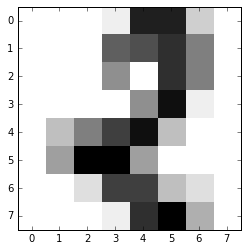

In [18]:
plt.imshow(digits.data[54, :].reshape(8, 8),  interpolation='nearest',  cmap='gray_r')

In [6]:
digits.target[54]

2

## 学習と予測

In [13]:
clf = svm.SVC(gamma=0.001, C=100.)
# 最後の10個以外を使って学習
clf.fit(digits.data[:-10], digits.target[:-10])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

デフォルトのカーネル関数は、ラジアル基底関数(RBF, radial basis function)カーネル。
メタパラメータ(gammaやC)は下記の方法で決める。

- [Grid Search](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)
- [Cross Validation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

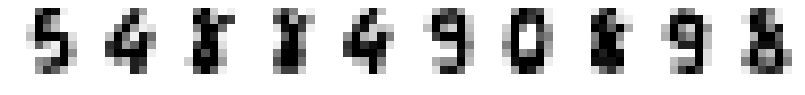

In [14]:
# テスト用の入力（データセットの最後の10個）の可視化
fig, ax = plt.subplots(1, 10, figsize=(14, 4))
for i in np.arange(-10, 0):
    ax[i].imshow(digits.data[i].reshape(8, 8), interpolation='nearest', cmap='gray_r')
    ax[i].axis('off')

In [15]:
# 予測結果
clf.predict(digits.data[-10:])

array([5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

## 正解率

In [ ]:
digits.target[-10:]

In [ ]:
metrics.accuracy_score(clf.predict(digits.data[-10:]), digits.target[-10:])

## 参考資料

https://github.com/PyDataOkinawa/meetup003/blob/master/PyData.Okinawa%20Meetup%20003%20-%2002%20Introduction%20to%20scikit-learn.ipynb